In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [2]:
dfx =pd.read_csv('./Datasets/Logistic_X_Train.csv')
dfy =pd.read_csv('./Datasets/Logistic_Y_Train.csv')
dfz =pd.read_csv('./Datasets/Logistic_X_Test.csv')
x =dfx.values
y =dfy.values
z =dfz.values


In [3]:
print(x.shape)

(3000, 3)


In [4]:
dfx.head(n=5)
y.shape

(3000, 1)

### 3D plane visualization

In [5]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

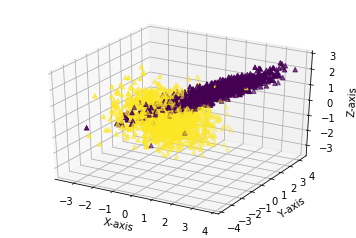

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

   # Generate the values
x_vals = x[:, 0]
y_vals = x[:, 1]
z_vals = x[:, 2]

   # Plot the values
ax.scatter(x_vals, y_vals, z_vals, c=y.reshape((-1,)),marker='^')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

### Normalization on given data

In [7]:
u = np.mean(x[:,:-1],axis=0)
sigma = np.std(x[:,:-1],axis=0)

x[:,:-1] = (x[:,:-1]-u)/sigma
print(x.shape)

(3000, 3)


In [8]:
ones = np.ones((x.shape[0],1),dtype='float32')

### Normalize plot

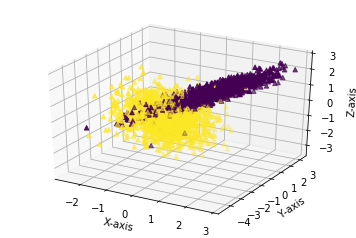

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

   # Generate the values
x_vals = x[:, 0]
y_vals = x[:, 1]
z_vals = x[:, 2]

   # Plot the values
ax.scatter(x_vals, y_vals, z_vals, c=y.reshape((-1,)),marker='^')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

In [10]:
final_data=np.hstack((ones,x))

In [11]:
y=y.reshape((-1,1))

In [12]:
final_data1=np.hstack((final_data,y))

In [13]:
final_data1

array([[ 1.        , -0.93471307, -0.24439694, -0.52851491,  1.        ],
       [ 1.        , -0.7823013 , -0.19327286, -1.28371152,  1.        ],
       [ 1.        , -0.46707053,  0.56681072, -1.39192706,  1.        ],
       ...,
       [ 1.        ,  0.06059095,  0.62470809, -2.19364056,  1.        ],
       [ 1.        ,  1.13777964, -0.13681202,  1.50530791,  0.        ],
       [ 1.        , -0.74013008, -0.42526137, -1.53939416,  1.        ]])

In [14]:
split = int(0.8*3000)
print(split)

2400


In [15]:
X_train = final_data1[:split,:-1]
X_test = final_data1[split:,:-1]

Y_train = final_data1[:split,-1]
Y_test  = final_data1[split:,-1]

In [16]:
X_train

array([[ 1.        , -0.93471307, -0.24439694, -0.52851491],
       [ 1.        , -0.7823013 , -0.19327286, -1.28371152],
       [ 1.        , -0.46707053,  0.56681072, -1.39192706],
       ...,
       [ 1.        ,  0.22608266, -0.58210362,  0.39914672],
       [ 1.        ,  0.80335407,  0.3686398 ,  1.29951859],
       [ 1.        ,  1.13805196,  0.66421556,  0.99552309]])

In [17]:
def hypothesis(x,w):
    h=np.dot(x,w)
    return sigmoid(h)

In [18]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

In [19]:
def error(y_true,x,w):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    return -err/m

In [20]:
def get_grad(y_true,x,w):
    grad_w=np.zeros(w.shape)
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w)
        grad_w+=(y_true[i]-hx)*x[i]
    grad_w /=m
    return [grad_w]


In [21]:
def grad_Descent(x,y_true,w,learning_rate=0.01):
    err=error(y_true,x,w)
    [grad_w]=get_grad(y_true,x,w)
    w=w+learning_rate*grad_w
    return err,w

In [22]:
def predict(x,w):
    confidence=hypothesis(x,w)
    if confidence <=0.5:
        return 0
    else:
        return 1

In [23]:
def get_acc(x_tst,y_tst,w):
    y_pred=[]
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    return float((y_pred==y_tst).sum( ))/y_tst.shape[0]

In [24]:
loss=[]
acc=[]
w=2*np.random.random((x.shape[1],))


In [25]:
for i in range(500):
    l,w=grad_Descent(x,y,w,learning_rate=0.1)
    acc.append(get_acc(X_test[:,1:],Y_test,w))
    loss.append(l)


In [26]:
print(acc[-1]*100)

99.0


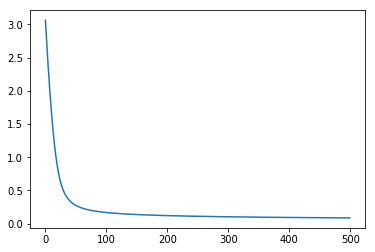

In [27]:
plt.plot(loss)

###  Plotting plane

- Thetas

In [28]:
w

array([-2.59965635,  1.56154968, -2.09529593])

0.5  = sigmoid(w1\*x1 + w2\*x2 + w3\*x3)

w1\*x1 + w2\*x2 + w3\*x3 = 0

x3 = -1 * (w1\*x1 + w2\*x2)/w3

# 3D visualization of 

In [29]:
x1=np.arange(-3,3,0.1)
x2=np.arange(-3,3,0.1)

x1,x2=np.meshgrid(x1,x2)
x3 = np.zeros_like(x1)

In [30]:
%matplotlib notebook

In [31]:
for i in range(x3.shape[0]):
    for j in range(x3.shape[1]):
        x3[i,j] = -1 * (w[0] * x1[i,j] +  w[1] * x2[i,j])/w[2]

<IPython.core.display.Javascript object>


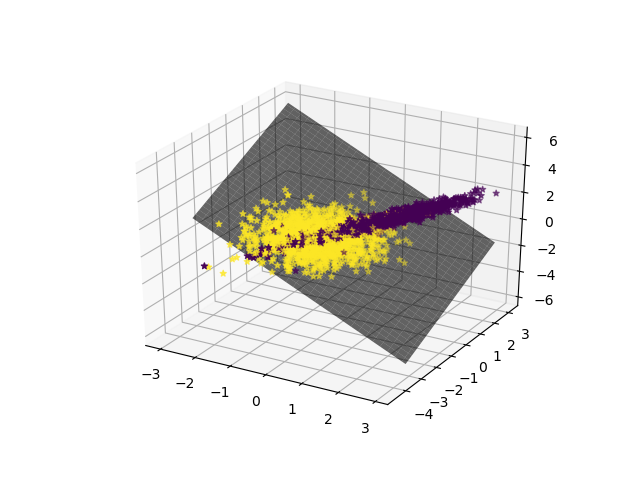

In [32]:
fig = plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(x_vals, y_vals, z_vals, c=y.reshape((-1,)), marker="*")
axes.plot_surface(x1,x2,x3,alpha=0.6,color='k')
plt.show()

In [33]:
y_pred=[]
for i in range(1000):
    y_pred.append(predict(z[i],w))

In [34]:
y_pred=np.array(y_pred)

In [35]:
import pandas as pd

In [36]:
df=pd.DataFrame(y_pred,columns=['label'])

In [37]:
df.to_csv("sample.csv",index=False)

# The above plane look like this Logistic hyperplane

![alt text](plot.png "Logistic hyperplane")
